In [1]:
using LinearAlgebra, Plots, LaTeXStrings, QuadGK

In [2]:
include("Funciones")

Simpson38 (generic function with 2 methods)

In [3]:
# plotlyjs()

# Proyecto Final-Trompo que gira sobre su eje

#### Física Computacional. Grupo 8266.

#### Facultad de Ciencias. Universidad Nacional Autónoma de México

 En este codigo desarrollamos una simulación de un trompo usando las técnicas vistas en clase y librerías de Julia

Consideraremos un trompo, pero como aproximación para calcular el tensor de inercia, upondremos que el trompo se asemeja a un cono, haciendo esto, el tensor de inercia (en el SR que estamos considerando) está dado por las siguientes ecuaciones

$$
I_{zz} = \frac{3}{10}m R^2
$$
$$
I_{xx} = I_{yy} = \frac{3m(R^2 + 4H)}{20}
$$

Donde R es el radio de la base y H es la altura del cono

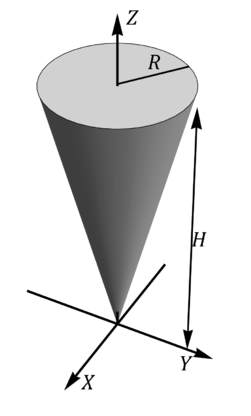

Definimos las ecuaciones que nos interesan
$$
V(\theta) \equiv \frac{(p_\varphi - p_\psi \cos{\theta})^2}{2 I_1 \sin^2{\theta} } + Mgh \cos{\theta}
$$
$$
E = E'+ \frac{1}{2} \frac{p^2_\psi}{I_3}
$$

$$
t(\theta) = \int_{\theta_0}^{\theta}{\frac{d\theta'}{\sqrt{(2/I_1)[E'-V(\theta ')]}}}
\iff
\dot{\theta}= \sqrt{\frac{2}{I_1}(E'-V)}
$$
$$
\dot{\varphi} = \frac{p_\varphi - p_\psi \cos{\theta}}{I_1 \sin^2{\theta}}
$$
$$
\dot{\psi} = \frac{p_\psi}{I_3} - \frac{(p_\varphi - p_\psi \cos{\theta}) \cos{\theta}}{I_1 \sin^2{\theta}}
$$

Para encontrar todas las variables debemos resolver para $\theta$ y después encontrar $\varphi~~ \text{y}~~ \psi $ a partir de sus derivadas

In [4]:
# Variables libres: M, g, h, pψ, pφ, I1, I3, En
function V(θ)
    return (pϕ - pψ*cos(θ))^2/(2*I1*(sin(θ))^2) + M*g*alt*cos(θ)
end

function t(θ,θ_inicial,En)
    integrando(x) = 1/sqrt((2/I1)*(En-V(x)))
    integral,err = quadgk(x->integrando(x),θ_inicial,θ,rtol=1e-8)
    return integral
end

function dθ(θ,En)
    return sqrt((2/I1)*(En-V(θ)))
end

function dϕ(θ)
    return (pϕ - pψ*cos(θ))/(I1 * (sin(θ))^2)
end

function dψ(θ)
    return (pψ)/(I3) - (pϕ - pψ* cos(θ))*cos(θ)/(I1*(sin(θ))^2)
end

dψ (generic function with 1 method)

Primero graficamos el potencial y averiguamos los valores de $\theta$ que debemos utitlizar para una energía dada

In [5]:
# Condiciones Iniciales
M = (0.15)*5;
R = (0.045)*5;
g = (9.8);
alt = (0.12)*5;
I1 = ((3*M/20)*(R^2 + 4*alt^2))*5;
I3 = ((3/10)*M*alt^2)*5;
pϕ = (0.7)*5;
pψ = (0.9)*5;
Ep = 20;

Punto mínimo del potencial

In [6]:
θ_min = Des_∇(V,0.8,1e-4)
println(θ_min)
V(θ_min)

0.8396076210571894


3.2086018588797063

Si $Ep = 20$ ¿Cuál es el rango de $\theta$ ?

In [7]:
θ_Ep_i = NewtonRaph(z->(V(z)-Ep),0.1)
θ_Ep_f = NewtonRaph(z->(V(z)-Ep),2.1)
println(V(θ_Ep_i))
println(V(θ_Ep_f))
println("Rango de θ: [$θ_Ep_i,$θ_Ep_f]")

20.000000000000274
20.00000000000004
Rango de θ: [0.1816705465321908,2.021079709182096]


In [8]:
V(θ_Ep_f)

20.00000000000004

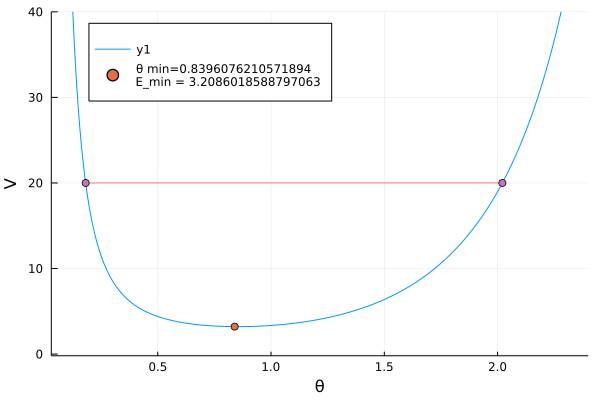

In [9]:
# Grafica de V(θ)
ts = 0.07:0.001:2.53
plot(ts, V.(ts))
scatter!([θ_min,],[V(θ_min)], label="θ min=$θ_min \nE_min = $(V(θ_min))", legend= :top)
plot!([θ_Ep_i,θ_Ep_f],[V(θ_Ep_i),V(θ_Ep_f)], label=false, color=:red, alpha=0.5)
scatter!([θ_Ep_i,θ_Ep_f],[V(θ_Ep_i),V(θ_Ep_f)], label=false)
yaxis!("V")
xaxis!("θ")
xlims!(0.03,2.4)
ylims!(-0.2,40)

Encontramos ahora $\theta (t)$ para $E' = 20$, para esto, primero encontramos $t(\theta)$ y después la invertimos

**Nota: Intentamos definir la función t(θ,θ_inicial,En) usando la regla 3,8 de Simpson, hicimos la función (que de hecho está en el archivo funciones) pero para calcular la celda de abajo se tardó aproximadamente 96 minutos en terminar de compilar; evidentemente esto no es bueno, así que al final usamos la librería QuadGK.**

**Pero como prueba de que el algoritmo sí funciona, dejamos esta pequeña muestra:**

In [10]:
Simpson38(x->x^2,0,1,1e6)

0.33333322222238376

Ahora sí, encontramos $t(\theta)$

In [11]:
dom = θ_Ep_i+0.001:0.0001:θ_Ep_f-0.0001
a = t.(dom,dom[1],Ep);

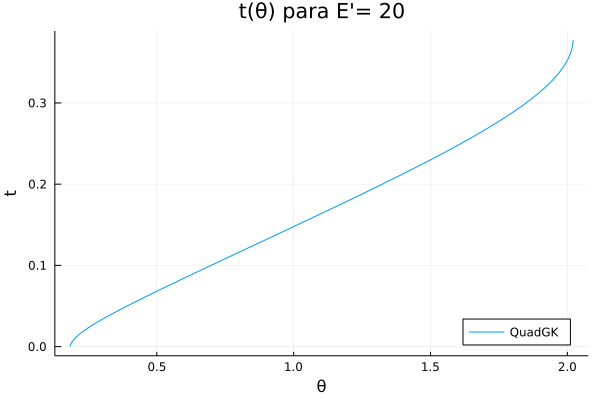

In [12]:
plot(dom,a, label="QuadGK")
yaxis!("t")
xaxis!("θ")
title!("t(θ) para E'= $Ep",legend=:bottomright)

Creamos la función $\theta(t)$ usando interpolación lineal

In [13]:
θ_Ep = InterpolLineal(a,dom)

(::var"#f#5"{Array{Float64,1},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}) (generic function with 1 method)

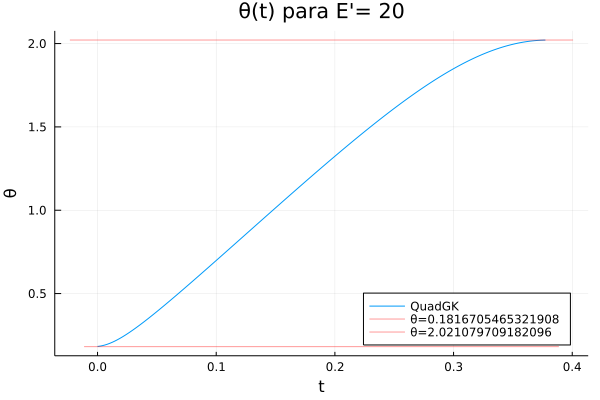

In [14]:
dom2 = 0:0.0001:a[end]
plot(dom2,θ_Ep.(dom2) , label="QuadGK")
plot!(x->θ_Ep_i,label="θ=$θ_Ep_i",color=:red,alpha=0.4)
plot!(x->θ_Ep_f,label="θ=$θ_Ep_f",color=:red,alpha=0.4,legend=:bottomright)
xaxis!("t")
yaxis!("θ")
title!("θ(t) para E'= $Ep")

Notamos que $\theta$ se mueve en el rango predicho

Los mismos pasos no se pueden repetir exactamente para $E' = V_{min}$

In [15]:
E_min = V(θ_min)
println(E_min)
println(θ_min)

3.2086018588797063
0.8396076210571894


In [16]:
t(θ_min,θ_min,E_min+0.0001) #Ponemos E_min+0.0001 para evitar que la función regrese NaN

0.0

Evidentemente la función $t(\theta)$ regresará cero puesto que solo se puede evaluar la integral en el punto $\theta_{min}$ para $E_{min}$, $\theta_{min}(t)$ es una constante $\implies~~ \theta_{min}(t)=θ_{min}$

In [17]:
θ_m(t) = θ_min

θ_m (generic function with 1 method)

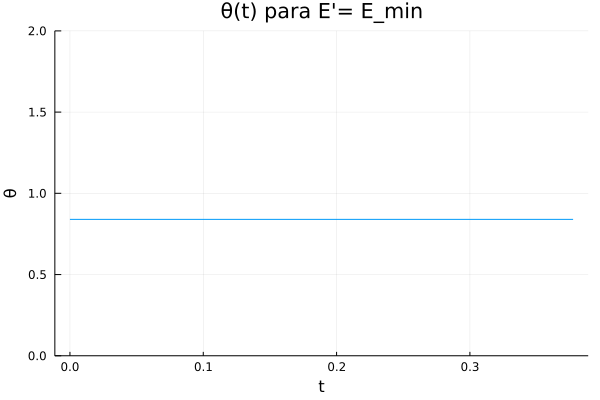

In [18]:
dom2 = 0:0.0001:a[end]
plot(dom2,θ_m.(dom2) , label=false)
# ylims!(0,1)
xaxis!("t")
yaxis!("θ")
title!("θ(t) para E'= E_min")
ylims!(0,2)

Teniendo $\theta(t)$ podemos encontrar $\dot{\theta}(t)$

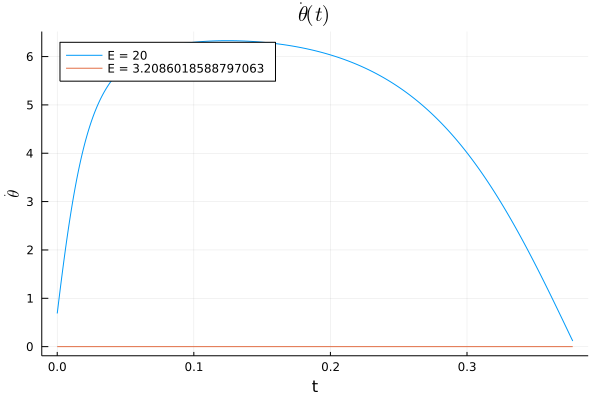

In [19]:
# Recordemos dom2 = 0:0.0001:0.731
deriv_θ_Ep = [dθ(θ_Ep(t),Ep) for t in dom2]
deriv_θ_min = [dθ(θ_m(t),E_min) for t in dom2]
plot(dom2, deriv_θ_Ep, label="E = $Ep")
plot!(dom2, deriv_θ_min,label="E = $E_min",legend=:topleft)
title!(L"\dot{\theta}(t)")
xaxis!("t")
yaxis!("\$ \\dot{\\theta} \$")

Graficamos el espacio fase


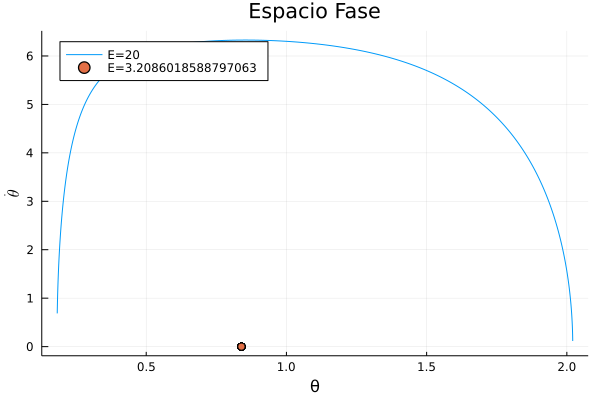

In [20]:
plot(θ_Ep.(dom2),deriv_θ_Ep, label="E=$Ep")
scatter!(θ_m.(dom2),deriv_θ_min,label="E=$E_min",legend=:topleft)
title!("Espacio Fase")
xlabel!("θ")
ylabel!(L"\dot{\theta}")

Ahora encontramos $\dot{\varphi} = \frac{p_\varphi - p_\psi \cos{\theta}}{I_1 \sin^2{\theta}}$, primero para $E' = 20$.

Recordemos que Rango de θ: $[0.16471282830342465,2.301895633077816]$ por lo que $\dot{\varphi}$ esta bien definida para todo punto

In [21]:
ϕEp_dot = InterpolLineal(dom2,[dϕ(θ_Ep(t)) for t in dom2])
ϕmin_dot = InterpolLineal(dom2,[dϕ(θ_m(t)) for t in dom2])

(::var"#f#5"{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},Array{Float64,1}}) (generic function with 1 method)

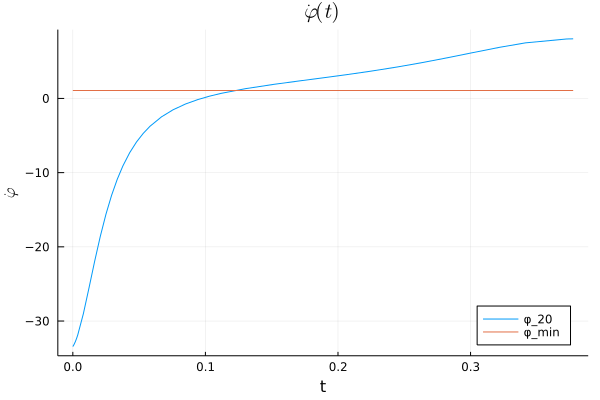

In [22]:
plot(ϕEp_dot,0,dom2[end], label="φ_20")
plot!(ϕmin_dot,0,dom2[end], label="φ_min",legend=:bottomright)
title!(L"\dot{\varphi}(t)")
xaxis!("t")
yaxis!(L"\dot{\varphi}")

Ahora encontraremos $\varphi(t) $, usamos integración numérica

In [23]:
function ϕ(t,En)
    if En=="min"
        integral,err = quadgk(x->ϕmin_dot(x),0,t,rtol=1e-8)
    else
        integral,err = quadgk(x->ϕEp_dot(x),0,t,rtol=1e-5)
    end
    return integral
end

ϕ (generic function with 1 method)

In [24]:
emppi_ϕ = ϕ.(dom2,Ep);
emppi_ϕmin = ϕ.(dom2,"min");

In [25]:
# Definimos φ haciendo una interpolación
ϕ_Ep = InterpolLineal(dom2,emppi_ϕ)
ϕ_min = InterpolLineal(dom2,emppi_ϕmin)

(::var"#f#5"{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},Array{Float64,1}}) (generic function with 1 method)

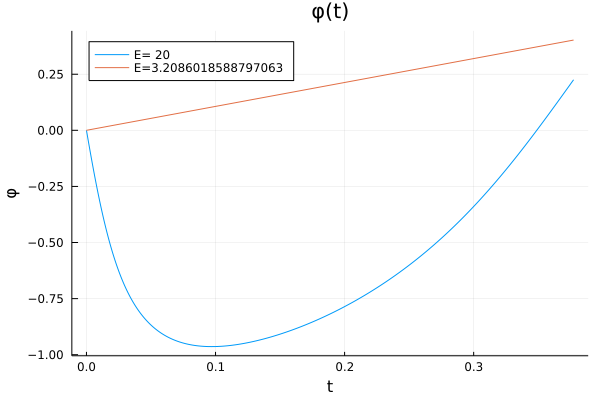

In [26]:
plot(dom2,emppi_ϕ,label="E= $Ep")
plot!(dom2,emppi_ϕmin,label="E=$E_min",legend=:topleft)
title!("φ(t)")
xlabel!("t")
ylabel!("φ")

Para el espacio fase

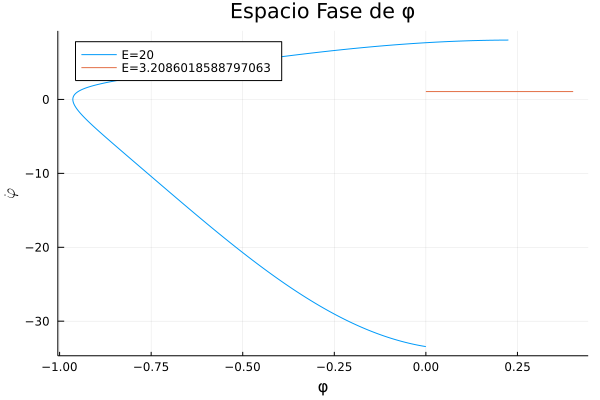

In [27]:
plot(emppi_ϕ,ϕEp_dot.(dom2), label="E=$Ep")
plot!(emppi_ϕmin,ϕmin_dot.(dom2),label="E=$E_min",legend=:topleft)
title!("Espacio Fase de φ")
xlabel!("φ")
ylabel!(L"\dot{\varphi}")

Ahora encontramos $\dot{\psi} = \frac{p_\psi}{I_3} - \frac{(p_\varphi - p_\psi \cos{\theta}) \cos{\theta}}{I_1 \sin^2{\theta}}$, para ello, definimos una función auxiliar

El rango de θ(t): $[0.16471282830342465,2.301895633077816]$ por lo que $\dot{\psi}$ esta bien definida para todo punto

In [28]:
ψEp_dot = InterpolLineal(dom2,[dψ(θ_Ep(t)) for t in dom2])
ψmin_dot = InterpolLineal(dom2,[dψ(θ_m(t)) for t in dom2])

(::var"#f#5"{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},Array{Float64,1}}) (generic function with 1 method)

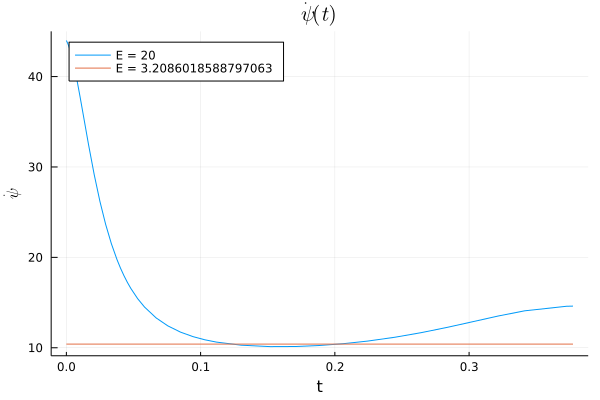

In [29]:
plot(ψEp_dot,0,dom2[end], label="E = $Ep")
plot!(ψmin_dot,0,dom2[end] , label="E = $E_min", legend=:topleft)
title!(L"\dot{\psi}(t)")
xaxis!("t")
yaxis!(L"\dot{\psi}")
#ylims!(-20,20)

Y ahora buscamos $\psi(t)$

In [30]:
function ψ(t,En)
    if En=="min"
        integral,err = quadgk(x->ψmin_dot(x),0,t,rtol=1e-8)
    else
        integral,err = quadgk(x->ψEp_dot(x),0,t,rtol=1e-5)
    end
    return integral
end

ψ (generic function with 1 method)

In [31]:
emppi_ψ = ψ.(dom2,20);
emppi_ψmin = ψ.(dom2,"min");

In [32]:
ψ_Ep = InterpolLineal(dom2,emppi_ψ)
ψ_min = InterpolLineal(dom2,emppi_ψmin)

(::var"#f#5"{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},Array{Float64,1}}) (generic function with 1 method)

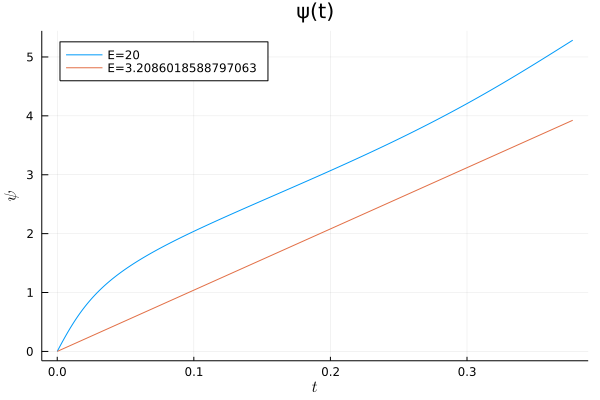

In [33]:
plot(dom2,emppi_ψ,label="E=$Ep")
plot!(dom2,emppi_ψmin,label="E=$E_min",legend=:topleft)
title!("ψ(t)")
ylabel!(L"\psi")
xlabel!(L"t")

Espacio fase para $\psi$

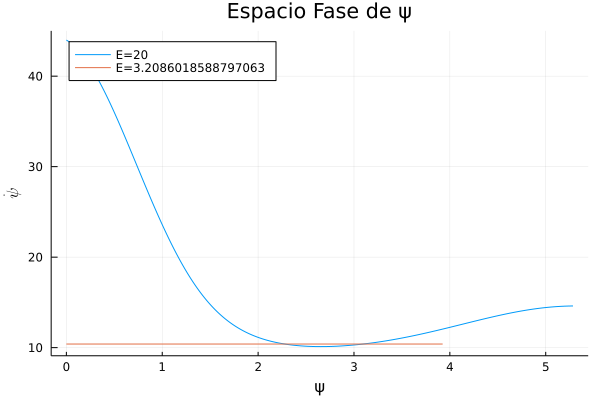

In [34]:
plot(emppi_ψ,ψEp_dot.(dom2), label="E=$Ep")
plot!(emppi_ψmin,ψmin_dot.(dom2),label="E=$E_min",legend=:topleft)
title!("Espacio Fase de ψ")
xlabel!("ψ")
ylabel!(L"\dot{\psi}")

Animación para $E'=20$

In [35]:
# Angulos de Euler en función del tiempo 
dom2 = 0:0.0001:a[end]
ejeθ = θ_Ep.(dom2)
ejeϕ = ϕ_Ep.(dom2)
ejeψ = ψ_Ep.(dom2);

In [36]:
# Posición del CM y los ejes en el sistema pegado al Cuerpo Rígido (sistema primado)
CM = [0,0,(3/4)*alt]
eje_x_p = [0.1,0,0] + CM
eje_y_p = [0,0.1,0] + CM
eje_z_p = [0,0,0.1] + CM;

In [37]:
# Posición CM en SR no primado
# Rot es la matriz de rotación para los ángulos de Euler
ran_an = 1:10:length(dom2)
eje_x = [Rot(eje_x_p,ejeθ[i],ejeϕ[i],ejeψ[i]) for i in ran_an]; 
eje_y = [Rot(eje_y_p,ejeθ[i],ejeϕ[i],ejeψ[i]) for i in ran_an];
eje_z = [Rot(eje_z_p,ejeθ[i],ejeϕ[i],ejeψ[i]) for i in ran_an];
R_CM = [Rot(CM,ejeθ[i],ejeϕ[i],ejeψ[i]) for i in ran_an]
println(R_CM[1])
println(eje_x[1])

[0.0, 0.0, 0.44999999999999996]
[0.09833620782545668, 0.018165633226193693, 0.44999999999999996]


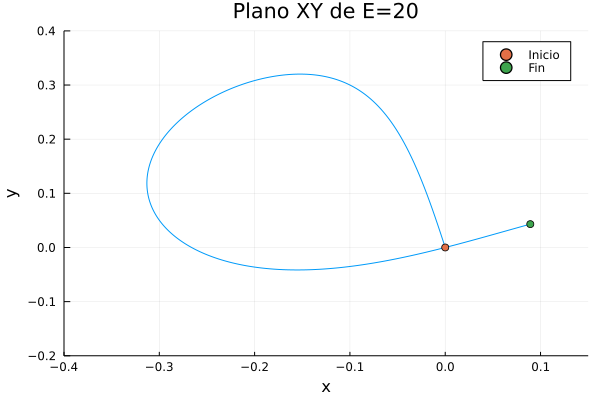

In [38]:
# Grafica el plano xy
prooo_x = [R_CM[i][1] for i in 1:size(R_CM)[1]]
prooo_y = [R_CM[i][2] for i in 1:size(R_CM)[1]]
plot(prooo_x,prooo_y,label=false)
scatter!([prooo_x[1]],[prooo_y[1]],label="Inicio")
scatter!([prooo_x[end]],[prooo_y[end]],label="Fin")
title!("Plano XY de E=$Ep")
xlabel!("x")
ylabel!("y")
xlims!(-0.4,0.15)
ylims!(-0.2,0.4)

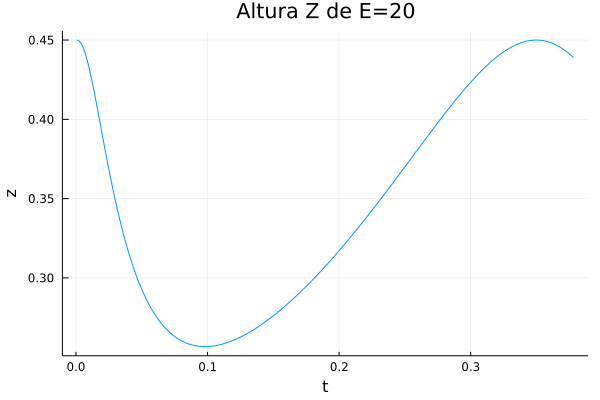

In [39]:
# Grafica la altura del CM
prooo_z = [R_CM[i][3] for i in 1:size(R_CM)[1]]
tz = [i/1000 for i in 1:size(R_CM)[1]]
plot(tz,prooo_z,label=false)
title!("Altura Z de E=$Ep")
xlabel!("t")
ylabel!("z")

In [40]:
gr()
intento_1 = @animate for i in 1:10:length(ran_an)
    # Dibujar el CM
    Plots.scatter([R_CM[i][1]],[R_CM[i][2]],[R_CM[i][3]],label="CM")
    # Dibujar el eje  x'
    plot!([R_CM[i][1],eje_x[i][1]],[R_CM[i][2],eje_x[i][2]],[R_CM[i][3],eje_x[i][3]],label=false)
    scatter!([eje_x[i][1]],[eje_x[i][2]],[eje_x[i][3]],label=false,marker=:ltriangle)
    # Dibujar el eje y'
    plot!([R_CM[i][1],eje_y[i][1]],[R_CM[i][2],eje_y[i][2]],[R_CM[i][3],eje_y[i][3]],label=false)
    scatter!([eje_y[i][1]],[eje_y[i][2]],[eje_y[i][3]],label=false,marker=:ltriangle)
    # Dibujar el eje z'
    plot!([R_CM[i][1],eje_z[i][1]],[R_CM[i][2],eje_z[i][2]],[R_CM[i][3],eje_z[i][3]],label=false)
    scatter!([eje_z[i][1]],[eje_z[i][2]],[eje_z[i][3]],label=false, camera=(45,45),marker=:ltriangle)
    # Dibujar el sistema de referencia fijo
    plot!([0,1],[0,0],[0,0],label=false,color=:black)
    plot!([0,0],[0,1],[0,0],label=false,color=:black)
    plot!([0,0],[0,0],[0,1],label=false,color=:black, size=(700,500))
    # Definir límites de graficación
    xlims!(-0.5,0.5)
    ylims!(-0.5,0.5)
    zlims!(0,0.5)
    xlabel!("x")
    ylabel!("y")
    title!("Trompo con E = $Ep \n t = $(i/1000) s")
end

Animation("C:\\Users\\ESTEBA~1\\AppData\\Local\\Temp\\jl_9fH29X", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000029.png", "000030.png", "000031.png", "000032.png", "000033.png", "000034.png", "000035.png", "000036.png", "000037.png", "000038.png"])

┌ Info: Saved animation to 
│   fn = C:\Users\Esteban AG\Documents\UNAM\7mo_Semestre\Fisica_Computacional\Proyecto_Final\P_mov_E20.gif
└ @ Plots C:\Users\Esteban AG\.julia\packages\Plots\isZEW\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Esteban AG\\Documents\\UNAM\\7mo_Semestre\\Fisica_Computacional\\Proyecto_Final\\P_mov_E20.gif")
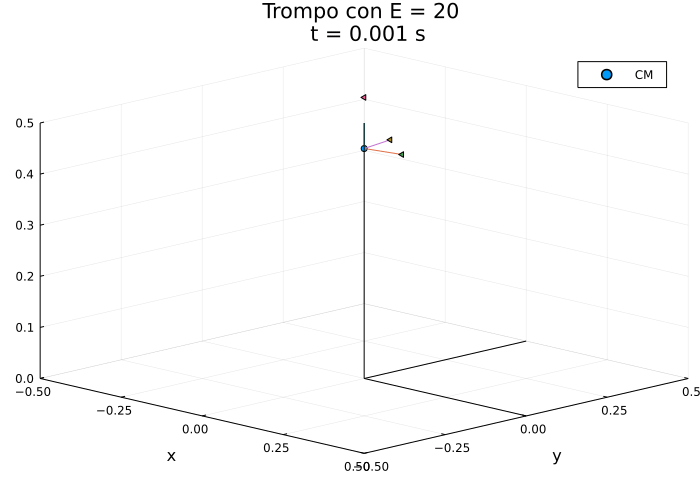

In [41]:
gif(intento_1,"P_mov_E20.gif",fps=30)

Animación para $E = E_{min}$

In [42]:
# Angulos de Euler en función del tiempo 
dom2 = 0:0.0001:a[end]
ejeθ_min = θ_m.(dom2)
ejeϕ_min = ϕ_min.(dom2)
ejeψ_min = ψ_min.(dom2);

In [43]:
# Posición del CM y los ejes en el sistema pegado al Cuerpo Rígido (sistema primado)
CM = [0,0,(3/4)*alt]
eje_x_p = [0.1,0,0] + CM
eje_y_p = [0,0.1,0] + CM
eje_z_p = [0,0,0.1] + CM;

In [44]:
# Posición CM en SR no primado
ran_an = 1:10:length(dom2)
eje_x_min = [Rot(eje_x_p,ejeθ_min[i],ejeϕ_min[i],ejeψ_min[i]) for i in ran_an]; 
eje_y_min = [Rot(eje_y_p,ejeθ_min[i],ejeϕ_min[i],ejeψ_min[i]) for i in ran_an];
eje_z_min = [Rot(eje_z_p,ejeθ_min[i],ejeϕ_min[i],ejeψ_min[i]) for i in ran_an];
R_CM_min = [Rot(CM,ejeθ_min[i],ejeϕ_min[i],ejeψ_min[i]) for i in ran_an]
println(R_CM[1])
println(eje_x[1])

[0.0, 0.0, 0.44999999999999996]
[0.09833620782545668, 0.018165633226193693, 0.44999999999999996]


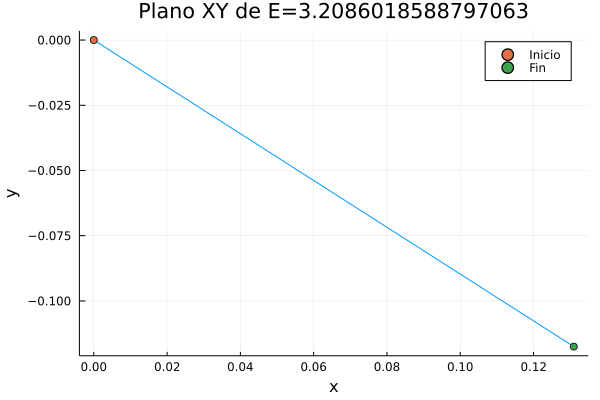

In [49]:
# Grafica el plano xy
prooo_x = [R_CM_min[i][1] for i in 1:size(R_CM_min)[1]]
prooo_y = [R_CM_min[i][2] for i in 1:size(R_CM_min)[1]]
plot(prooo_x,prooo_y,label=false)
scatter!([prooo_x[1]],[prooo_y[1]],label="Inicio")
scatter!([prooo_x[end]],[prooo_y[end]],label="Fin")
title!("Plano XY de E=$E_min")
xlabel!("x")
ylabel!("y")

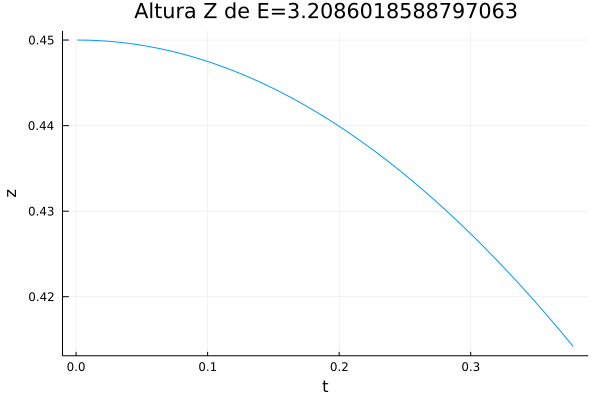

In [46]:
# Grafica la altura del CM
prooo_z_min = [R_CM_min[i][3] for i in 1:size(R_CM_min)[1]]
tz_min = [i/1000 for i in 1:size(R_CM_min)[1]]
plot(tz_min,prooo_z_min,label=false)
title!("Altura Z de E=$E_min")
xlabel!("t")
ylabel!("z")

In [47]:
gr()
intento_2 = @animate for i in 1:10:length(ran_an)
    # Dibujar el CM
    Plots.scatter([R_CM_min[i][1]],[R_CM_min[i][2]],[R_CM_min[i][3]],label="CM")
    # Dibujar el eje  x'
    plot!([R_CM_min[i][1],eje_x_min[i][1]],[R_CM_min[i][2],eje_x_min[i][2]],[R_CM_min[i][3],eje_x_min[i][3]],label=false)
    scatter!([eje_x_min[i][1]],[eje_x_min[i][2]],[eje_x_min[i][3]],label=false,marker=:ltriangle)
    # Dibujar el eje y'
    plot!([R_CM_min[i][1],eje_y_min[i][1]],[R_CM_min[i][2],eje_y_min[i][2]],[R_CM_min[i][3],eje_y_min[i][3]],label=false)
    scatter!([eje_y_min[i][1]],[eje_y_min[i][2]],[eje_y_min[i][3]],label=false,marker=:ltriangle)
    # Dibujar el eje z'
    plot!([R_CM_min[i][1],eje_z_min[i][1]],[R_CM_min[i][2],eje_z_min[i][2]],[R_CM_min[i][3],eje_z_min[i][3]],label=false)
    scatter!([eje_z_min[i][1]],[eje_z_min[i][2]],[eje_z_min[i][3]],label=false, camera=(45,45),marker=:ltriangle)
    # Dibujar el sistema de referencia fijo
    plot!([0,1],[0,0],[0,0],label=false,color=:black)
    plot!([0,0],[0,1],[0,0],label=false,color=:black)
    plot!([0,0],[0,0],[0,1],label=false,color=:black, size=(700,500))
    # Definir límites de graficación
    xlims!(-0.5,0.5)
    ylims!(-0.5,0.5)
    zlims!(0,0.5)
    xlabel!("x")
    ylabel!("y")
    title!("Trompo con energía mínima E=$E_min \n t = $(i/1000) s")
end

Animation("C:\\Users\\ESTEBA~1\\AppData\\Local\\Temp\\jl_V1xNc3", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000029.png", "000030.png", "000031.png", "000032.png", "000033.png", "000034.png", "000035.png", "000036.png", "000037.png", "000038.png"])

┌ Info: Saved animation to 
│   fn = C:\Users\Esteban AG\Documents\UNAM\7mo_Semestre\Fisica_Computacional\Proyecto_Final\P_mov_min1.gif
└ @ Plots C:\Users\Esteban AG\.julia\packages\Plots\isZEW\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Esteban AG\\Documents\\UNAM\\7mo_Semestre\\Fisica_Computacional\\Proyecto_Final\\P_mov_min1.gif")
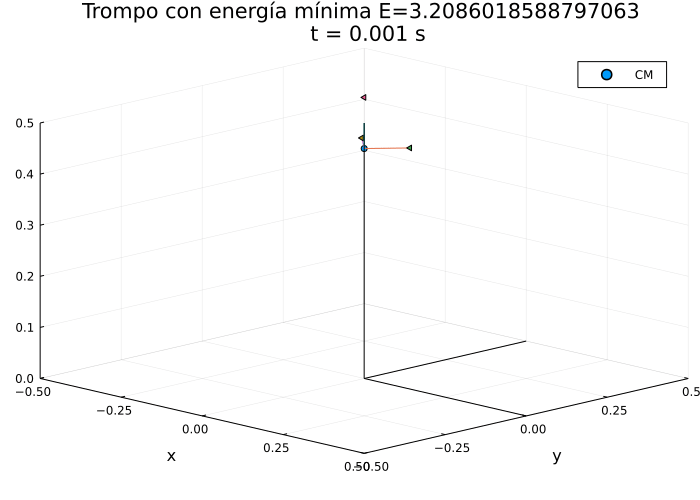

In [48]:
gif(intento_2,"P_mov_min1.gif",fps=30)